# Chapter 10: Hands on Exploratory Data Analysis (EDA)

***

<img src="./images/ML16b.png" alt="ML" width="1000"/>

***

<img src="./images/MNIST0.png" alt="MNIST" width="1000"/>

<img src="./images/MNIST.png" alt="MNIST" width="1000"/>

<img src="./images/MNIST1.png" alt="MNIST" width="1000"/>

<img src="./images/MNIST2.png" alt="MNIST" width="1000"/>

<img src="./images/MNIST3.png" alt="MNIST" width="1000"/>

***

<img src="./images/EDA0.png" alt="EDA" width="1000"/>

***

<img src="./images/EDA00.png" alt="EDA" width="1000"/>

***

<img src="./images/EDA1.png" alt="EDA" width="1000"/>

***

<img src="./images/EDA2.png" alt="EDA" width="1000"/>

***

 # Loading the Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.int8)

# Display dataset info
print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")

Dataset shape: (70000, 784), Labels shape: (70000,)


Dataset shape: (70000, 784)
70000: This refers to the total number of images in the dataset. The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9).
784: Each image is 28x28 pixels, and when flattened into a one-dimensional array, it results in 784 values (28 × 28 = 784). These values represent the intensity (grayscale value) of each pixel in the image.
So, (70000, 784) means you have 70,000 images, and each image is represented as a vector of length 784, corresponding to the pixel values.

Labels shape: (70000,)
The labels correspond to the actual digit (0-9) each image represents.
70000: There are 70,000 labels, one for each image, where each label is a single digit (0-9).
The shape (70000,) indicates that this is a one-dimensional array with 70,000 elements, each representing the label for the corresponding image in the dataset.

***

# Visualizing Sample Images

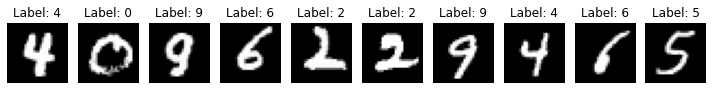

In [2]:
y = y.astype(np.int8)  # Convert the labels to integers

# Function to plot sample images
def plot_sample_images(X, y, num_samples=10):
    # Randomly select indices for the samples
    random_indices = np.random.choice(X.shape[0], num_samples, replace=False)
    
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X.iloc[idx].values.reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y.iloc[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot random samples from the dataset
plot_sample_images(X, y, num_samples=10)

***

<img src="./images/EDA6.png" alt="EDA" width="1000"/>

Mean Pixel Intensity: 33.385964741253645
Standard Deviation of Pixel Intensity: 49.25570412611293


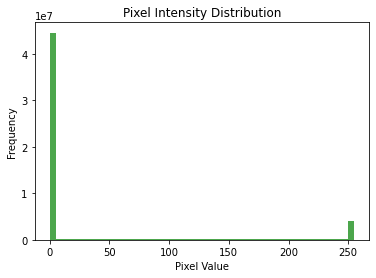

In [3]:
mean_intensity = X.mean().mean()
std_intensity = X.std().mean()
print(f"Mean Pixel Intensity: {mean_intensity}")
print(f"Standard Deviation of Pixel Intensity: {std_intensity}")

# Plot pixel intensity histogram
plt.hist(X.values.flatten(), bins=50, color='green', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

<img src="./images/EDA10.png" alt="EDA" width="1000"/>

Shape of dataset: (70000, 784)
Number of labels: 10
Class distribution in the dataset:
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: class, dtype: int64


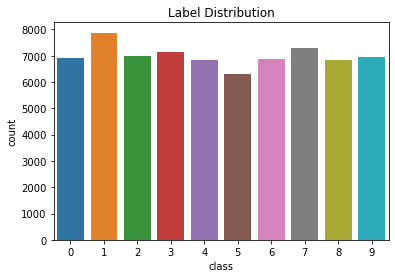

In [4]:
print(f"Shape of dataset: {X.shape}")
print(f"Number of labels: {len(np.unique(y))}")

print("Class distribution in the dataset:")
print(pd.Series(y).value_counts().sort_index())

sns.countplot(x=y)
plt.title("Label Distribution")
plt.show()

***

<img src="./images/EDA9.png" alt="EDA" width="1000"/>

# Height and Width of digits

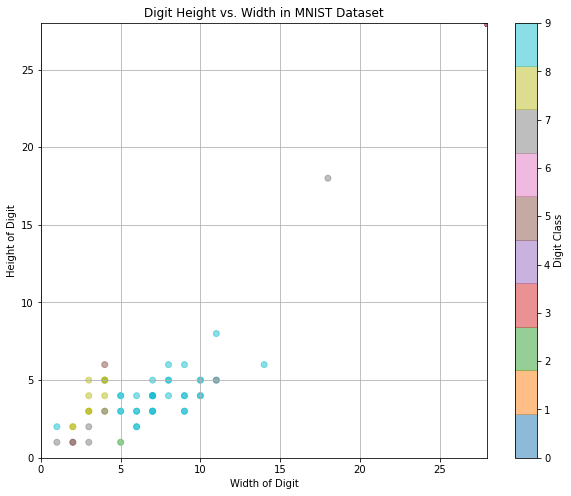

In [5]:
## Let's define height and width of digits

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
import cv2

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']
y = y.astype(np.int8)  # Convert the labels to integers

# Function to calculate height and width of the digit in the image
def calculate_digit_dimensions(image):
    # Reshape image to 28x28
    img = image.values.reshape(28, 28).astype(np.uint8)

    # Binarize the image
    _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Get the bounding box of the largest contour
        x, y, w, h = cv2.boundingRect(contours[0])
        return h, w  # Return height and width
    else:
        return 0, 0  # If no contours found, return (0, 0)

# Calculate height and width for each image
dimensions = np.array([calculate_digit_dimensions(X.iloc[i]) for i in range(len(X))])
heights = dimensions[:, 0]
widths = dimensions[:, 1]

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(widths, heights, c=y, cmap='tab10', alpha=0.5)
plt.title('Digit Height vs. Width in MNIST Dataset')
plt.xlabel('Width of Digit')
plt.ylabel('Height of Digit')
plt.colorbar(scatter, label='Digit Class')
plt.xlim(0, 28)
plt.ylim(0, 28)
plt.grid(True)
plt.show()

# Area (H*W) vs Aspect Ratio (H / w)

No handles with labels found to put in legend.


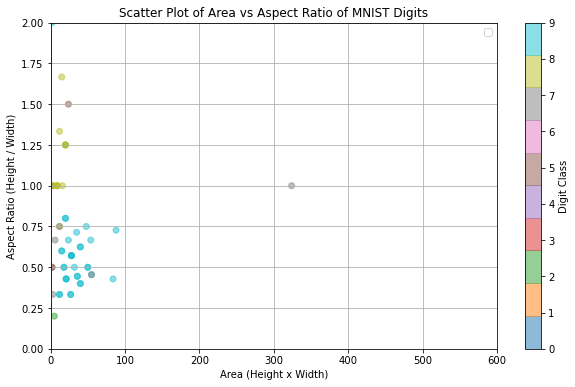

In [6]:

# Function to calculate height and width of the digit in the image
def calculate_digit_dimensions(image):
    img = image.values.reshape(28, 28).astype(np.uint8)
    _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        return h, w  # Return height and width
    else:
        return 0, 0  # If no contours found, return (0, 0)

# Calculate height and width for each image
dimensions = np.array([calculate_digit_dimensions(X.iloc[i]) for i in range(len(X))])
heights = dimensions[:, 0]
widths = dimensions[:, 1]

# Calculate area and aspect ratio
areas = heights * widths
aspect_ratios = heights / widths

# Create a scatter plot of Area vs Aspect Ratio
plt.figure(figsize=(10, 6))
scatter = plt.scatter(areas, aspect_ratios, c=y, cmap='tab10', alpha=0.5)
plt.colorbar(scatter, label='Digit Class', ticks=range(10))  # Color bar for digit classes
plt.title('Scatter Plot of Area vs Aspect Ratio of MNIST Digits')
plt.xlabel('Area (Height x Width)')
plt.ylabel('Aspect Ratio (Height / Width)')
plt.grid(True)
plt.xlim(0, 600)  # Limit x-axis (area range)
plt.ylim(0, 2)  # Limit y-axis (aspect ratio range)
plt.legend()
plt.show()

# Plot images with AREA > 300

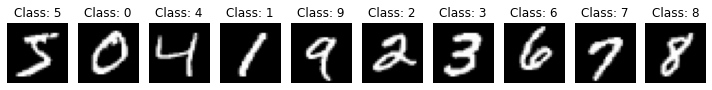

Classes with area > 300: [5 0 4 1 9 2 3 6 7 8]


In [7]:
# Find indices where area > 300
indices_large_area = np.where(areas > 300)[0]

# Get corresponding classes for these indices
classes_large_area = y.iloc[indices_large_area]

# Identify unique classes in the filtered results
unique_classes = classes_large_area.unique()

# Plot examples of digits with area > 300 for each unique class
plt.figure(figsize=(10, 10))
for i, digit_class in enumerate(unique_classes):
    # Get one example for the current class
    example_index = indices_large_area[classes_large_area[indices_large_area] == digit_class][0]
    
    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(X.iloc[example_index].values.reshape(28, 28), cmap='gray')
    plt.title(f"Class: {digit_class}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Display the unique classes that have area > 300
print("Classes with area > 300:", unique_classes)

# Area (where intensity > 10) vs Aspect Ratio

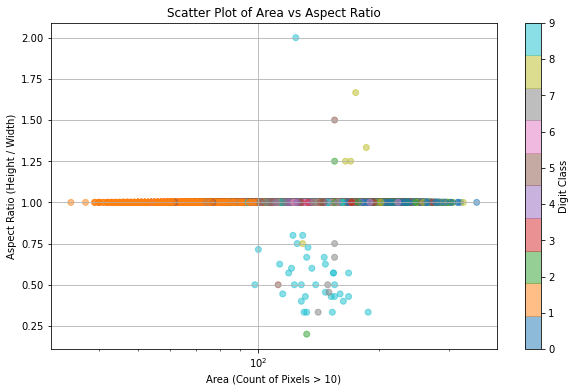

In [8]:
# Function to calculate area (count of pixels where intensity > 10) and dimensions (height and width)
def calculate_area_and_dimensions(image):
    img = image.values.reshape(28, 28).astype(np.uint8)
    
    # Area = count of pixels with intensity > 10
    area = np.count_nonzero(img > 10)
    
    # Find contours to calculate height and width
    _, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        return area, h, w  # Return area, height, and width
    else:
        return 0, 0, 0  # If no contours found, return (0, 0, 0)

# Calculate area, height, and width for each image
results = np.array([calculate_area_and_dimensions(X.iloc[i]) for i in range(len(X))])
areas = results[:, 0]
heights = results[:, 1]
widths = results[:, 2]

# Calculate aspect ratio
aspect_ratios = heights / (widths + 1e-5)  # Avoid division by zero

# Create a scatter plot of Area vs Aspect Ratio
plt.figure(figsize=(10, 6))
scatter = plt.scatter(areas, aspect_ratios, c=y, cmap='tab10', alpha=0.5)
plt.title('Scatter Plot of Area vs Aspect Ratio')
plt.xlabel('Area (Count of Pixels > 10)')
plt.ylabel('Aspect Ratio (Height / Width)')
plt.colorbar(scatter, label='Digit Class')
plt.grid()
plt.xscale('log')  # Use logarithmic scale for better visibility
plt.show()

<img src="./images/EDA7.png" alt="EDA" width="1000"/>

<Figure size 864x432 with 0 Axes>

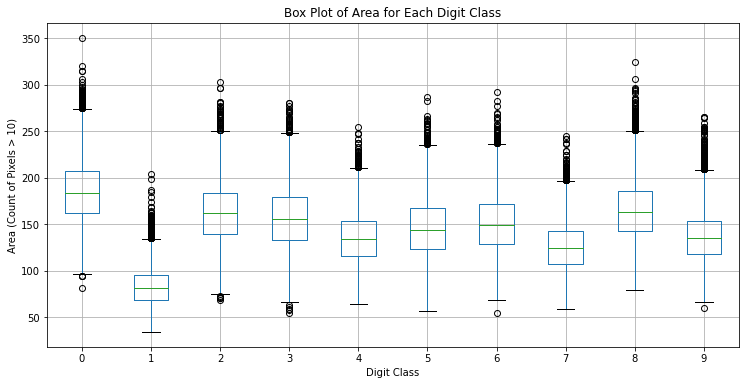

In [12]:
## Box plot on Area

# Function to calculate area (count of pixels > 10)
def calculate_area(image):
    img = image.values.reshape(28, 28).astype(np.uint8)
    area = np.count_nonzero(img > 10)  # Area is the count of pixels with intensity > 10
    return area

# Calculate area for each image
areas = np.array([calculate_area(X.iloc[i]) for i in range(len(X))])

# Create a DataFrame with areas and corresponding labels
df = pd.DataFrame({'Area': areas, 'Digit': y})

# Create a box plot of area for each digit class
plt.figure(figsize=(12, 6))
df.boxplot(column='Area', by='Digit', grid=False, figsize=(12, 6))
# boxplot = df.boxplot(column='Area', by='Digit', grid=False)
plt.title('Box Plot of Area for Each Digit Class')
plt.suptitle('')  # Suppress the default title to make it cleaner
plt.xlabel('Digit Class')
plt.ylabel('Area (Count of Pixels > 10)')
plt.xticks(rotation=0)
plt.grid()
plt.show()

# Symmetry score

<Figure size 864x432 with 0 Axes>

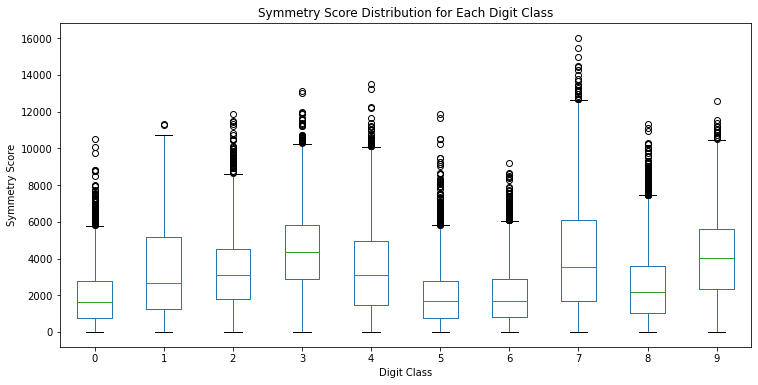

In [46]:
## Symmetry Score

# Function to calculate symmetry score
def calculate_symmetry_score(image):
    image = image.values.reshape(28, 28)  # Reshape to 28x28
    left_half = image[:, :14]  # Left half of the image
    right_half = image[:, 14:]  # Right half of the image
    
    # Calculate the symmetry score as the absolute difference between the sums of both halves
    symmetry_score = np.abs(np.sum(left_half) - np.sum(right_half))
    return symmetry_score

# Calculate symmetry scores for all images
symmetry_scores = np.array([calculate_symmetry_score(X.iloc[i]) for i in range(X.shape[0])])

# Create a DataFrame to store scores with corresponding labels
df = pd.DataFrame({'Label': y, 'Symmetry Score': symmetry_scores})

# Plot the distribution of symmetry scores for each class
plt.figure(figsize=(12, 6))
df.boxplot(column='Symmetry Score', by='Label', grid=False, figsize=(12, 6))
plt.title('Symmetry Score Distribution for Each Digit Class')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Digit Class')
plt.ylabel('Symmetry Score')
plt.xticks(rotation=0)
plt.show()

***

***

# Visualizing Mean Image per Class

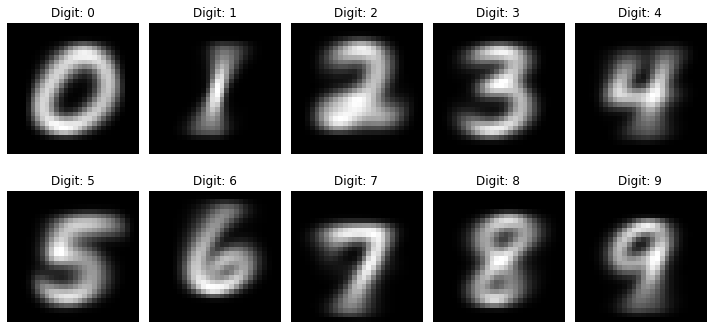

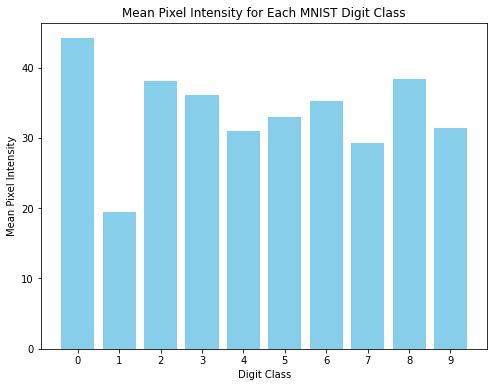

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean image for each digit
mean_images = np.array([X[y == digit].mean(axis=0) for digit in range(10)])

# Calculate the mean pixel intensity for each class (digit)
mean_intensities = mean_images.mean(axis=1)

# Plot the mean images for digits 0-9
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Digit: {i}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Bar plot of the mean pixel intensity for each class
plt.figure(figsize=(8, 6))
plt.bar(range(10), mean_intensities, color='skyblue')
plt.xlabel('Digit Class')
plt.ylabel('Mean Pixel Intensity')
plt.title('Mean Pixel Intensity for Each MNIST Digit Class')
plt.xticks(range(10))  # Display digits 0 to 9 as labels
plt.show()

***

<img src="./images/EDA11.png" alt="EDA" width="1000"/>

***

<img src="./images/EDA12.png" alt="EDA" width="1000"/>